In [1]:
import pandas as pd
from google.colab import files
uploaded=files.upload()

Saving FDF.xlsx to FDF.xlsx


In [2]:
import io
data=pd.read_excel(io.BytesIO(uploaded['FDF.xlsx']))
data

,username,name,tweet,hashtags,Jobs,embed,bio,main_Job,CLUSTERS,emojie,tweet_comb,pre_pro,No_emo,bio_new,hashtags_subs,pre_pro_RHRW,pre_pro_RH,pre_pro_RHW
0,GiGiHadid,Gigi Hadid,"['few things 😋🙃😘', 'You were facing the right ...",giforce,model,['model'],IMG Models Worldwide. #giforce,model,2,sparkles,"IMG Models Worldwide. #giforce ['few things ',...",img models worldwide thing face right way exac...,IMG Models Worldwide. #giforce,img models worldwide,giforce,img models worldwide thing face right way exac...,img models worldwide thing face right way exac...,img models worldwide thing face right way exac...
1,Cantguardmike,Michael William Thomas Jr.,"['Facts !', '@jhardee_19 called it like 2 mont...",gobucks,football wide receiver,['receiver'],GOD GOT US,footballer,3,NaN,"GOD GOT US ['Facts !', '@jhardee_19 called it ...",fact call like month ago congratulation get re...,GOD GOT US,NaN,gobucks,fact call like month ago congratulation get re...,fact call like month ago congratulation get re...,fact call like month ago congratulation get re...
2,IAMJHUD,Jennifer Hudson,"['Team JHud, please help me wish my Virgo sist...","neverforget,baobabstudios,respectmovie,ebony,v...","singer , actress","['singer', 'actress']","Grammy winning Artist, Academy Award winning A...",singer actress,4,sparkles,"Grammy winning Artist, Academy Award winning A...",grammy win artist academy award win actress ne...,"Grammy winning Artist, Academy Award winning A...",grammy win artist academy award win actress ne...,business twitter,grammy win artist academy award win actress ne...,grammy win artist academy award win actress ne...,grammy win artist academy award win actress ne...
3,lukajones,Luka Jones,"['@johnnypemberton Here we go 🏈', 'gracias for...","goclippers,rcjh,topcity,goblue,rcjh","actor , comedian","['actor', 'comedian']",actor (Shrill & People of Earth both on @hulu)...,actor comedian,6,baseball football basketball,actor (Shrill & People of Earth both on @hulu)...,actor thrill people earth philosophy reader ch...,actor (Shrill & People of Earth both on @hulu)...,actor thrill people earth philosophy reader ch...,thrill people,actor thrill people earth philosophy reader ch...,actor thrill people earth philosophy reader ch...,actor thrill people earth philosophy reader ch...
4,rcobb18,Randall Cobb (American football),['Man It Feels Good to Be a Packer https://t....,"mvp,ad,winitforted,jerseyswap,verzuz,ad,jersey...",football wide receiver,['receiver'],Faith in the Creator of Life. Husband. Father....,footballer,3,football,Faith in the Creator of Life. Husband. Father....,faith creator life husband father son brother ...,Faith in the Creator of Life. Husband. Father....,faith creator life husband father son brother ...,creator faith,faith creator life husband father son brother ...,faith creator life husband father son brother ...,faith creator life husband father son brother ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,ColinHanks,Colin Hanks,['@PFTompkins The old man has a pretty sweet c...,"hankskerchiefs,hankskerchiefs,beready,beready,tbt","actor , producer , director","['actor', 'producer']",NaN,actor producer,6,NaN,['@PFTompkins The old man has a pretty sweet ...,old man pretty sweet chariot right well play m...,NaN,NaN,official com,old man pretty sweet chariot right well play m...,old man pretty sweet chariot right well play m...,old man pretty sweet chariot right well play m...
1310,CraigyFerg,Craig Ferguson,['Tonight! @TheHustlerABC @ABCNetwork #thecrai...,"thecraigfergusonshow,thecraigfergusonshow,theh...","actor , author , comedian , television host","['actor', 'author']",NaN,actor author,1,NaN,['Tonight! @TheHustlerABC @ABCNetwork #thecra...,tonight thursday june season premiere miss sus...,NaN,NaN,instagram thehustler,tonight thursday june season premiere miss sus...,tonight thursday june season premiere miss sus...,tonight thursday june season premiere miss sus...
1311,GeraldFinley,Gerald Finley,['

In [16]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

data["tokens"] =data["pre_pro_RH"].apply(tokenizer.tokenize)
data.head()

,username,name,tweet,hashtags,Jobs,embed,bio,main_Job,CLUSTERS,emojie,tweet_comb,pre_pro,No_emo,bio_new,hashtags_subs,pre_pro_RHRW,pre_pro_RH,pre_pro_RHW,tokens
0,GiGiHadid,Gigi Hadid,"['few things 😋🙃😘', 'You were facing the right ...",giforce,model,['model'],IMG Models Worldwide. #giforce,model,2,sparkles,"IMG Models Worldwide. #giforce ['few things ',...",img models worldwide thing face right way exac...,IMG Models Worldwide. #giforce,img models worldwide,giforce,img models worldwide thing face right way exac...,img models worldwide thing face right way exac...,img models worldwide thing face right way exac...,"[img, models, worldwide, thing, face, right, w..."
1,Cantguardmike,Michael William Thomas Jr.,"['Facts !', '@jhardee_19 called it like 2 mont...",gobucks,football wide receiver,['receiver'],GOD GOT US,footballer,3,NaN,"GOD GOT US ['Facts !', '@jhardee_19 called it ...",fact call like month ago congratulation get re...,GOD GOT US,NaN,gobucks,fact call like month ago congratulation get re...,fact call like month ago congratulation get re...,fact call like month ago congratulation get re...,"[fact, call, like, month, ago, congratulation,..."
2,IAMJHUD,Jennifer Hudson,"['Team JHud, please help me wish my Virgo sist...","neverforget,baobabstudios,respectmovie,ebony,v...","singer , actress","['singer', 'actress']","Grammy winning Artist, Academy Award winning A...",singer actress,4,sparkles,"Grammy winning Artist, Academy Award winning A...",grammy win artist academy award win actress ne...,"Grammy winning Artist, Academy Award winning A...",grammy win artist academy award win actress ne...,business twitter,grammy win artist academy award win actress ne...,grammy win artist academy award win actress ne...,grammy win artist academy award win actress ne...,"[grammy, win, artist, academy, award, win, act..."
3,lukajones,Luka Jones,"['@johnnypemberton Here we go 🏈', 'gracias for...","goclippers,rcjh,topcity,goblue,rcjh","actor , comedian","['actor', 'comedian']",actor (Shrill & People of Earth both on @hulu)...,actor comedian,6,baseball football basketball,actor (Shrill & People of Earth both on @hulu)...,actor thrill people earth philosophy reader ch...,actor (Shrill & People of Earth both on @hulu)...,actor thrill people earth philosophy reader ch...,thrill people,actor thrill people earth philosophy reader ch...,actor thrill people earth philosophy reader ch...,actor thrill people earth philosophy reader ch...,"[actor, thrill, people, earth, philosophy, rea..."
4,rcobb18,Randall Cobb (American football),['Man It Feels Good to Be a Packer https://t....,"mvp,ad,winitforted,jerseyswap,verzuz,ad,jersey...",football wide receiver,['receiver'],Faith in the Creator of Life. Husband. Father....,footballer,3,football,Faith in the Creator of Life. Husband. Father....,faith creator life husband father son brother ...,Faith in the Creator of Life. Husband. Father....,faith creator life husband father son brother ...,creator faith,faith creator life husband father son brother ...,faith creator life husband father son brother ...,faith creator life husband father son brother ...,"[faith, creator, life, husband, father, son, b..."


In [5]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

all_words = [word for tokens in data["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

342345 words total, with a vocabulary size of 22182
Max sentence length is 884


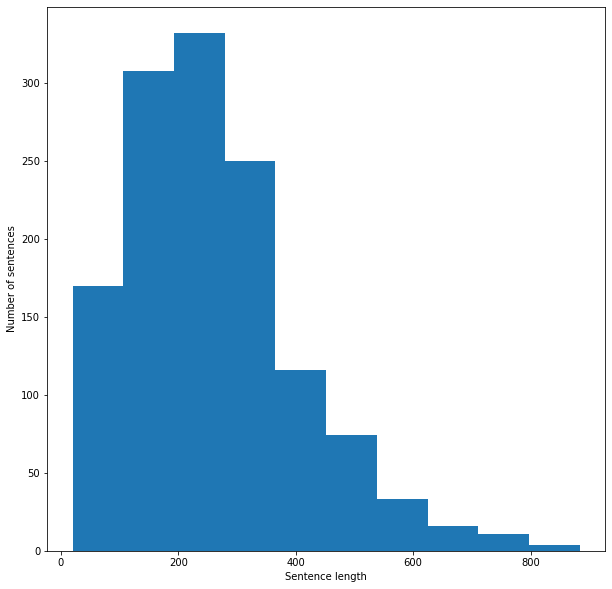

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split( data["pre_pro_RH"].tolist(),data["CLUSTERS"].tolist(), test_size=0.2, 
                                                                                random_state=40)

In [18]:

import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

In [19]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1



In [20]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [21]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
clf_tfidf = LogisticRegression(C=4.0, class_weight='balanced', solver='newton-cg', multi_class='multinomial', n_jobs=-1, random_state=40)
clf_tfidf.fit(X_train_tfidf, y_train)
y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

In [22]:

accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, 
                                                                       recall_tfidf, f1_tfidf))

accuracy = 0.540, precision = 0.510, recall = 0.540, f1 = 0.516


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


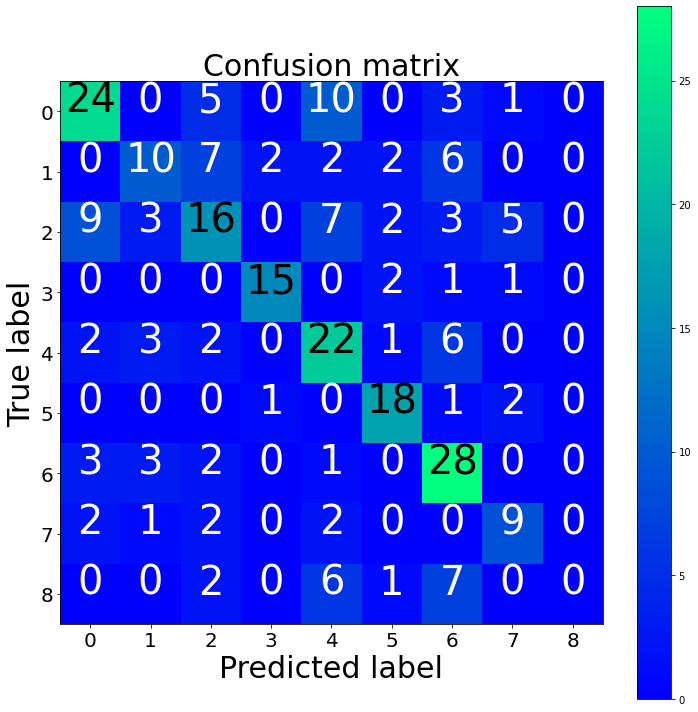

TFIDF confusion matrix
[[24  0  5  0 10  0  3  1  0]
 [ 0 10  7  2  2  2  6  0  0]
 [ 9  3 16  0  7  2  3  5  0]
 [ 0  0  0 15  0  2  1  1  0]
 [ 2  3  2  0 22  1  6  0  0]
 [ 0  0  0  1  0 18  1  2  0]
 [ 3  3  2  0  1  0 28  0  0]
 [ 2  1  2  0  2  0  0  9  0]
 [ 0  0  2  0  6  1  7  0  0]]


In [23]:

cm2 = confusion_matrix(y_test, y_predicted_tfidf)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm2,classes=[0,1,2,3,4,5,6,7,8], normalize=False, title='Confusion matrix')
plt.show()
print("TFIDF confusion matrix")
print(cm2)